# Classical Linear Regression Model

## [예제] 공부시간이 길수록 시험점수가 높다
 •  입력 Feature(독립변수)가 한 개(공부시간)이므로 단순(simple) 선형 회귀모델 사용 <br>
 •  해당 데이터를 가장 잘 표현하는 일차직선? W(weight)와 b(bias)를 찾아보자.

,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,7,40


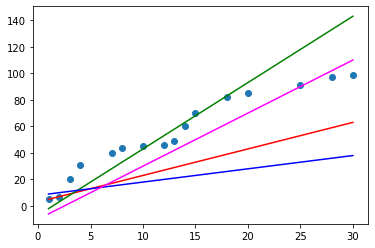

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_dict = {
    '공부시간(x)': [1,2,3,4,7,8,10,12,13,14,15,18,20,25,28,30], # 독립변수 1개
    '시험점수(t)': [5,7,20,31,40,44,45,46,49,60,70,82,85,91,97,99]
}
df = pd.DataFrame(my_dict)
display(df.head())

plt.scatter(df['공부시간(x)'], df['시험점수(t)']) # x축, y축

# Linear Regression Model에 따른 임의의 직선 그래프
plt.plot(df['공부시간(x)'], df['공부시간(x)']*2 + 3, color='r') # x축, y축(y=2x+3)
plt.plot(df['공부시간(x)'], df['공부시간(x)']*5 - 7, color='g') 
plt.plot(df['공부시간(x)'], df['공부시간(x)']*1 + 8, color='b') 
plt.plot(df['공부시간(x)'], df['공부시간(x)']*4 - 10, color='magenta') 

plt.show()

## 주어진 데이터에 가장 잘 맞는 직선(Linear Regression Model)을 찾아보자.

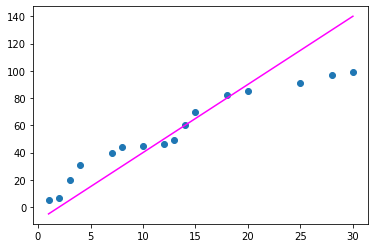

In [12]:
plt.scatter(df['공부시간(x)'], df['시험점수(t)'])

# Hypothesis
plt.plot(df['공부시간(x)'], df['공부시간(x)']*5 - 10, color='magenta') 

## Simple Linear Regression
Python 코드로 작성하려니 너무 힘들다...😢<br>
Tensorflow를 이용하여 다시 구현해보자.

In [2]:
%reset

import numpy as np


# 0. 수치미분 코드
def numerical_derivative(f, x):
    # f: loss function
    # x: W, b
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) 
    
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished: 
        idx = it.multi_index 
        print('현재의 idx: {}'.format(idx)) 

        tmp = x[idx]                        
        print('현재의 tmp: {}'.format(tmp)) # 1.0 # 2.0
        
        # x에 대한 편미분
        x[idx] = tmp + delta_x 
        fx_plus_delta = f(x) 
        
        # 중앙차분 미분 준비
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x) 
        
        # 중앙차분
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        # 두번째 독립변수에 대해 편미분 시행을 위해 원래 상태로 복구
        x[idx] = tmp 
    
        it.iternext() # 다음 iterator, 다음 칸으로 넘어감
        
    return derivative_x

# 미분하려는 다변수함수
def my_func(input_data):
    x = input_data[0]
    y = input_data[1]
    
    return 2*x + 3*x*y + np.power(y,3)


param = np.array([1.0, 2.0]) 
result = numerical_derivative(my_func, param) 
print('미분한 결과: {}'.format(result))



# 1. Training Data Set

# 입력 데이터, Lable
# View(복사값): 1차원 벡터 -> 5행 1열
x_data = np.array([1,2,3,4,5]).reshape(5,1) 
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# 2. Linear Regression Model

#(2-1) Weight, bias 정의
W = np.random.rand(1,1) # 초기값(랜덤) - 1행 1열
b = np.random.rand(1) # 초기값(랜덤) - 스칼라

#(2-2). 학습종료 후 임의의 데이터에 대해서 예측값을 알아오는 함수
def predict(x):
    # Predict Model = Hypothesis
    y = np.dot(x, W) + b # Y = X dot W + b 
    
    return y

# 3. Loss Function 정의
def loss_func():
    pass


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Tensorflow를 이용한 Simple Linear Regression 

### 들어가기전, Tensorflow 연습

In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.0


#### 문자열

In [3]:
node1 = tf.constant('Hello World') # 상수노드 생성
print(node1) # 노드 안에 Tensor(data)가 들어가 있음

# 그래프를 실행하기 위해서 1.x 버전에서는 session이 필요
# session: 그래프 안의 특정 노드를 실행시킴
sess = tf.Session()
print(sess.run(node1)) # node1 - 데이터 입출력 작업 실행 # b: bite string
print(sess.run(node1).decode()) # 문자열

Tensor("Const:0", shape=(), dtype=string)
b'Hello World'
Hello World


#### 수치연산

In [16]:
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(30, dtype=tf.float32)

node3 = node1 + node2

# node3 실행
sess = tf.Session()
print(sess.run(node3))

# 여러개 노드 실행
print(sess.run([node3, node1]))


40.0
[40.0, 10.0]
